In [47]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [48]:
import numpy as np
import glob
from tqdm import tqdm
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image


In [6]:
from sklearn.model_selection import train_test_split

## Loading Data


In [ ]:
# For colab

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
## To unzip images

# path_to_zip = "drive/MyDrive/img_align_celeba.zip"
# directory_to_extract_to = "drive/MyDrive/img_align_celeba"

# import zipfile
# with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

In [7]:
model = keras.applications.ResNet50()

In [8]:
from tensorflow.keras import layers
import glob

In [9]:
attributes =  pd.read_csv("list_attr_celeba.txt")
attributes.head()

,202599
0,5_o_Clock_Shadow Arched_Eyebrows Attractive Ba...
1,000001.jpg -1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 1...
2,000002.jpg -1 -1 -1 1 -1 -1 -1 1 -1 -1 -1 1...
3,000003.jpg -1 -1 -1 -1 -1 -1 1 -1 -1 -1 1 -1...
4,000004.jpg -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1...


In [10]:
images = glob.glob('img_align_celeba/*.jpg')
len(images)

35381

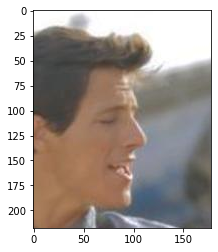

In [11]:
plt.imshow(mpimg.imread(images[2]))

In [12]:
x = []
size = 128
for i in tqdm(images[0:10000]):
  img = image.load_img(i, target_size=(size,size,3))
  img = image.img_to_array(img)
  x.append(img)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:22<00:00, 443.35it/s]


In [13]:
import csv 

save_path = "input_small.csv"

In [14]:
# Convert input into a csv for later use (just so it's faster to load images)

with open(save_path, 'w',  newline= '') as f:
  writer = csv.writer(f, delimiter=',')

  for i, img in enumerate(x):
    np_img = np.array(img)
    reshaped_img = np_img.reshape(1, -1)
    writer.writerow(reshaped_img[0])

    if i % 5000 == 0:
      print(i, end=' ') 

0 5000 

In [15]:
f.close()

In [16]:
# Load image data from csv to numpy array

size = 3000
x = np.zeros((size, 128, 128, 3)) # CNN requires input shape to be (#samples, width, height, channels)

with open(save_path, 'r') as f:
  for i, img in enumerate(f):
    vals = np.array([float(i) for i in img.split(",")])
    vals = vals.reshape(128, 128, 3)
    x[i,:,:,:] = vals
    # x.append(vals)

    if i % 5000 == 0:
      print(i, end=' ') 

    if i == size - 1:
      break

    # plt.imshow(vals.astype(np.uint8))
    # plt.show()

0 

In [17]:
# Convert list_attr_celeba.txt to csv file
import csv 

txt_file = "list_attr_celeba.txt"
csv_file = "list_attr_celeba1.csv"

with open(txt_file, 'r') as infile, open(csv_file, 'w') as outfile:
  writer = csv.writer(outfile)

  for i, line in enumerate(infile):
    if 0 < i < 20664: 
      attr = line.split(' ')
      while '' in attr: attr.remove('')
      attr[-1] = attr[-1].replace("\n", '')

      if i == 1: attr.insert(0, 'img_num'); attr.pop()

      writer.writerows([attr])

      if i < 10: print(attr)

['img_num', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
['000001.jpg', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '-1', '1', '-1', '-1', '1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '1', '-1', '-1', '1']
['000002.jpg', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '1', '-1', '-1', '1', '-1

In [18]:
print(attr)

['020662.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1']


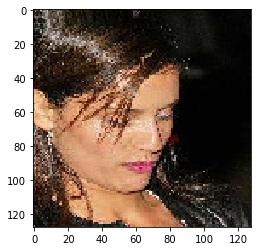

In [19]:
plt.imshow(x[3].astype(np.uint8))
plt.show()

In [20]:
csv_file = "list_attr_celeba1.csv"
data = pd.read_csv(csv_file)

In [21]:
# Replace -1's to 0's so "Binary_Crossentropy" can be used

data = data.replace(-1, 0)

In [22]:
print(data)

          img_num  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0      000001.jpg                 0                1           1   
1      000002.jpg                 0                0           0   
2      000003.jpg                 0                0           0   
3      000004.jpg                 0                0           1   
4      000005.jpg                 0                1           1   
...           ...               ...              ...         ...   
20657  020658.jpg                 0                0           0   
20658  020659.jpg                 0                0           1   
20659  020660.jpg                 0                0           0   
20660  020661.jpg                 1                0           1   
20661  020662.jpg                 0                0           0   

       Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                    0     0      0         0         0           0  ...   
1                    1     0   

## CNN for Binary Classification of one attribute. Black Hair was chosen for this. Only first 3000 samples were used to train/test.

In [23]:
# Creates the convolutional neural network
def create_model():
    model = keras.models.Sequential()

    # First layer of CNN with input layer
    model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Second layer of CNN
    model.add(keras.layers.Conv2D(64, (3, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Third layer of CNN
    model.add(keras.layers.Conv2D(128, (3, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Flatten the output and create fully connected layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256))

    # Output layer with 1 different class
    model.add(keras.layers.Dense(1))
    model.add(keras.layers.Activation('sigmoid'))

    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    return model


In [24]:
x_data = x
y_data = data.iloc[:3000]

In [25]:
print(type(x_data))

<class 'numpy.ndarray'>


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data.Black_Hair, test_size=0.2, random_state = 1)

In [30]:
# # If data was loaded directly into x using the 
# # '''for i in tqdm(images[0:]):''' code,
# # we have to reshape for CNN input since 
# # it wants data in the shape of (#samples, width, height, channels)

x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)

In [31]:
model = create_model()
history = model.fit(x_train, y_train, epochs=12)

print('Model evaluation ', model.evaluate(x_test, y_test))

Epoch 1/12
75/75 [==============================] - 26s 334ms/step - loss: 73.5398 - accuracy: 0.6804
Epoch 2/12
75/75 [==============================] - 25s 335ms/step - loss: 0.5616 - accuracy: 0.7980
Epoch 3/12
75/75 [==============================] - 26s 342ms/step - loss: 0.4893 - accuracy: 0.7954
Epoch 4/12
75/75 [==============================] - 27s 360ms/step - loss: 0.3787 - accuracy: 0.8508
Epoch 5/12
75/75 [==============================] - 26s 340ms/step - loss: 0.3142 - accuracy: 0.8635
Epoch 6/12
75/75 [==============================] - 26s 341ms/step - loss: 0.3097 - accuracy: 0.8840
Epoch 7/12
75/75 [==============================] - 26s 341ms/step - loss: 0.2312 - accuracy: 0.9041
Epoch 8/12
75/75 [==============================] - 26s 341ms/step - loss: 0.2339 - accuracy: 0.9034
Epoch 9/12
75/75 [==============================] - 27s 364ms/step - loss: 0.1662 - accuracy: 0.9343
Epoch 10/12
75/75 [==============================] - 32s 433ms/step - loss: 0.1469 - accur

[[0.99744606]]
1


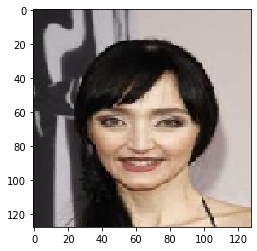

In [32]:
i = 22

test = x_test[i].reshape(1, 128, 128, 3)
print(model.predict(test))
print(y_test.iloc[i])
plt.imshow(x_test[i].astype(np.uint8))
plt.show()

## CNN for multilabel classication. Heavy_Makeup, High_Cheekbones, Male, and Mouth_Slightly_Open were used. Only first 3000 samples were used to train/test 

In [33]:
# Creates the convolutional neural network
def create_multi_label_model():
    model = keras.models.Sequential()

    # First layer of CNN with input layer
    model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Second layer of CNN
    model.add(keras.layers.Conv2D(64, (3, 3), padding='SAME'))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Third layer of CNN
    model.add(keras.layers.Conv2D(128, (3, 3), padding='SAME'))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Fourth layer of CNN
    model.add(keras.layers.Conv2D(256, (3, 3), padding='SAME'))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Flatten the output and create fully connected layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512))
    model.add(keras.layers.Dense(1024))

    # Output layer with 1 different class
    model.add(keras.layers.Dense(4))
    model.add(keras.layers.Activation('sigmoid'))

    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    return model

In [34]:
x_data = x/255 # Testing out data normalization
y_data = data.iloc[:3000, 19:23]

In [35]:
print(y_data)

      Heavy_Makeup  High_Cheekbones  Male  Mouth_Slightly_Open
0                1                1     0                    1
1                0                1     0                    1
2                0                0     1                    0
3                0                0     0                    0
4                1                0     0                    0
...            ...              ...   ...                  ...
2995             1                1     0                    1
2996             1                1     0                    1
2997             1                1     0                    1
2998             0                1     0                    1
2999             1                1     0                    0

[3000 rows x 4 columns]


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state = 1)

In [37]:
model = create_multi_label_model()
history = model.fit(x_train, y_train, epochs=60)

y_predict = model.predict(x_test)
y_predict = y_predict.round()


Epoch 1/60
75/75 [==============================] - 33s 434ms/step - loss: 0.7776 - accuracy: 0.1624
Epoch 2/60
75/75 [==============================] - 34s 450ms/step - loss: 0.5925 - accuracy: 0.4819
Epoch 3/60
75/75 [==============================] - 34s 450ms/step - loss: 0.5058 - accuracy: 0.6200
Epoch 4/60
75/75 [==============================] - 34s 452ms/step - loss: 0.4232 - accuracy: 0.6138
Epoch 5/60
75/75 [==============================] - 34s 459ms/step - loss: 0.3350 - accuracy: 0.5932
Epoch 6/60
75/75 [==============================] - 34s 460ms/step - loss: 0.2783 - accuracy: 0.5740
Epoch 7/60
75/75 [==============================] - 34s 456ms/step - loss: 0.2565 - accuracy: 0.5661
Epoch 8/60
75/75 [==============================] - 32s 421ms/step - loss: 0.2160 - accuracy: 0.5778
Epoch 9/60
75/75 [==============================] - 33s 436ms/step - loss: 0.2041 - accuracy: 0.5858
Epoch 10/60
75/75 [==============================] - 32s 431ms/step - loss: 0.1897 - accura

KeyboardInterrupt: 

In [ ]:
i = 1

from sklearn.metrics import accuracy_score
print(y_test.iloc[i])
print(y_predict[i])
acc = accuracy_score(y_test, y_predict)
print(acc)

## Visualize Data (Just a count of labels per attribute)

In [38]:
sums = data[:20661].sum(axis = 0, skipna = True)

In [39]:
pos = [sums[i] for i in range(1, len(sums))]

In [40]:
negs = [20661 - pos[i] for i in range(len(pos))]

In [41]:
categories = list(data.columns.values)[1:]

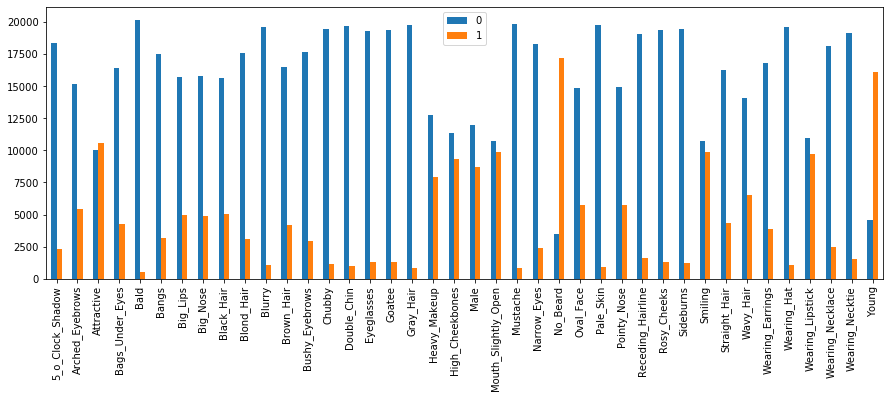

In [42]:
df = pd.DataFrame(np.c_[negs, pos], index=categories)
df.plot.bar(figsize=(15, 5))

plt.show()

In [60]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model

In [97]:
IMG_HEIGHT = 128
IMG_WIDTH = 128

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3))
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [64]:
for layer in resnet.layers[:45]:
    layer.trainable = False

In [80]:
import tensorflow.keras as K
import tensorflow as tf

In [98]:
def create_transfer_model():
    model = keras.models.Sequential()
    model.add(K.layers.Lambda(lambda image:tf.image.resize(image, (128, 128))))
    model.add(resnet)
    model.add(K.layers.Flatten())
    model.add(K.layers.BatchNormalization())
    
    model.add(K.layers.Dense(11, activation='softmax'))
    # First layer of CNN with input layer
    model.add(K.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
    model.add(K.layers.Activation('relu'))
    #model.add(K.layers.BatchNormalization())
    model.add(K.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Second layer of CNN
    model.add(K.layers.Conv2D(64, (3, 3)))
    model.add(K.layers.Activation('relu'))
    #model.add(K.layers.BatchNormalization())
    model.add(K.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Third layer of CNN
    model.add(K.layers.Conv2D(128, (3, 3)))
    model.add(K.layers.Activation('relu'))
    #model.add(K.layers.BatchNormalization())
    model.add(K.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Flatten the output and create fully connected layer
    model.add(K.layers.Flatten())
    model.add(K.layers.Dense(256))

    # Output layer with 1 different class
    model.add(K.layers.Dense(1))
    model.add(K.layers.Activation('sigmoid'))

    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    return model

In [114]:
def create_transfer_model_2():
    input_t = K.Input(shape=(128, 128, 3))
    res_model = K.applications.ResNet50(include_top=False,
                                        weights="imagenet",
                                        input_tensor=input_t)
    
    for layer in res_model.layers[:45]:
        layer.trainable = False
    #to_res = (224, 224)
    model = K.models.Sequential()
    #model.add(K.layers.Lambda(lambda image: tf.image.resize(image, to_res))) 
    model.add(res_model)
    model.add(K.layers.Flatten())
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(256, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(128, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(64, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(4, activation='softmax')) #this 
    
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    return model

In [115]:
transfer_model_2 = create_transfer_model_2()
history = transfer_model_2.fit(x_train, y_train, epochs=12)

#print('Model evaluation ', model.evaluate(x_test, y_test))

Epoch 1/12
75/75 [==============================] - 277s 4s/step - loss: 0.8620 - accuracy: 0.2640
Epoch 2/12
75/75 [==============================] - 256s 3s/step - loss: 0.7184 - accuracy: 0.3090
Epoch 3/12
75/75 [==============================] - 266s 4s/step - loss: 0.5930 - accuracy: 0.4744
Epoch 4/12
75/75 [==============================] - 263s 4s/step - loss: 0.5165 - accuracy: 0.5424
Epoch 5/12
75/75 [==============================] - 269s 4s/step - loss: 0.4821 - accuracy: 0.5693
Epoch 6/12
75/75 [==============================] - 262s 3s/step - loss: 0.4500 - accuracy: 0.5860
Epoch 7/12
75/75 [==============================] - 263s 4s/step - loss: 0.3995 - accuracy: 0.6064
Epoch 8/12
75/75 [==============================] - 208s 3s/step - loss: 0.3511 - accuracy: 0.6200
Epoch 9/12
75/75 [==============================] - 199s 3s/step - loss: 0.3524 - accuracy: 0.5917
Epoch 10/12
75/75 [==============================] - 200s 3s/step - loss: 0.3446 - accuracy: 0.5829
Epoch 11/